<font size="5">Data Analysis and Visualization of Credit Card Customers
</font>

In this project I prepared the data analysis about the "Credit Card Customers" on Kaggle using BankChurners.csv file. This project contents inclduing: 

1. Describing of Data
2. Understanding the Data
3. Preparing of Data
4. Analysis and Visualization of the data with plotly Library
5. Conclution

Link to dataset for more details:
https://www.kaggle.com/datasets/sakshigoyal7/credit-card-customers

<font size="5">About Dataset</font>

A manager at the bank is disturbed with more and more customers leaving their credit card services. They would really appreciate if one could predict for them who is gonna get churned so they can proactively go to the customer to provide them better services and turn customers' decisions in the opposite direction

I got this dataset from a website with the URL as https://leaps.analyttica.com/home. I have been using this for a while to get datasets and accordingly work on them to produce fruitful results. The site explains how to solve a particular business problem.

Now, this dataset consists of 10,000 customers mentioning their age, salary, marital_status, credit card limit, credit card category, etc. There are nearly 18 features.

We have only 16.07% of customers who have churned. Thus, it's a bit difficult to train our model to predict churning customers.



<font size="5">Begin - Import Libaraies that will use in this project.</font>

- Pandas will be used the create a dataframe.
- Numpy will be used for the arithmetic calculations if it is necessary
- Plotly and seaborn libraries will be used for the visualization.
- Math and matplotlib also will be used in this analysis


In [100]:
import pandas as pd # linear algebra
import numpy as np # data processing, CSV file 
import matplotlib.pyplot as plt
import seaborn as sea # works well with pandas stucture
import math
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.graph_objects as go 

#import os
#for dirname, _, filenames in os.walk('/kaggle/input'):
#    for filename in filenames:
#        print(os.path.join(dirname, filename))


<font size="5">1. Describling of Data
</font>

In [101]:
# Data is reading helping with the Pandas libray in this stage.
data = pd.read_csv('/Users/sangth/Desktop/USF-Springboard/Main_Profile/Credit_Card_Customers_project/1.Dataset/BankChurners.csv')

# Unneccesary columns are dropped from the dataframe
data.drop(columns = [data.columns[len(data.columns) - 1], data.columns[len(data.columns) - 2]], inplace = True)

data.head(10)

,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,1,3,12691.0,777,11914.0,1.335,1144,42,1.625,0.061
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,1,2,8256.0,864,7392.0,1.541,1291,33,3.714,0.105
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,1,0,3418.0,0,3418.0,2.594,1887,20,2.333,0.000
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,4,1,3313.0,2517,796.0,1.405,1171,20,2.333,0.760
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,1,0,4716.0,0,4716.0,2.175,816,28,2.500,0.000
5,713061558,Existing Customer,44,M,2,Graduate,Married,$40K - $60K,Blue,36,...,1,2,4010.0,1247,2763.0,1.376,1088,24,0.846,0.311
6,810347208,Existing Customer,51,M,4,Unknown,Married,$120K +,Gold,46,...,1,3,34516.0,2264,32252.0,1.975,1330,31,0.722,0.066
7,818906208,Existing Customer,32,M,0,High School,Unknown,$60K - $80K,Silver,27,...,2,2,29081.0,1396,27685.0,2.204,1538,36,0.714,0.048
8,710930508,Existing Customer,37,M,3,Uneducated,Single,$60K - $80K,Blue,36,...,2,0,22352.0,2517,19835.0,3.355,1350,24,1.182,0.113
9,719661558,Existing Customer,48,M,2,Graduate,Single,$80K - $120K,Blue,36,...,3,3,11656.0,1677,9979.0,1.524,1441,32,0.882,0.144


<font size="5">2. Understanding the Data</font>

<font size="3">Columns will be used during the analysis</font>

1. Attrition_Flag
2. Customer_Age
3. Gender
4. Dependent_Count
5. Marial_Status
6. Income_Category
7. Card_Category
8. Credit_Limit

In [102]:
# use .info()To check the datatypes of columns, as we can see, data has not any null-value.
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 21 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   CLIENTNUM                 10127 non-null  int64  
 1   Attrition_Flag            10127 non-null  object 
 2   Customer_Age              10127 non-null  int64  
 3   Gender                    10127 non-null  object 
 4   Dependent_count           10127 non-null  int64  
 5   Education_Level           10127 non-null  object 
 6   Marital_Status            10127 non-null  object 
 7   Income_Category           10127 non-null  object 
 8   Card_Category             10127 non-null  object 
 9   Months_on_book            10127 non-null  int64  
 10  Total_Relationship_Count  10127 non-null  int64  
 11  Months_Inactive_12_mon    10127 non-null  int64  
 12  Contacts_Count_12_mon     10127 non-null  int64  
 13  Credit_Limit              10127 non-null  float64
 14  Total_

In [103]:
# Before the start the analysis, we can check the all unique values of columns. 
# It can be helped us to visualize data as much as easily.
data.nunique()


CLIENTNUM                   10127
Attrition_Flag                  2
Customer_Age                   45
Gender                          2
Dependent_count                 6
Education_Level                 7
Marital_Status                  4
Income_Category                 6
Card_Category                   4
Months_on_book                 44
Total_Relationship_Count        6
Months_Inactive_12_mon          7
Contacts_Count_12_mon           7
Credit_Limit                 6205
Total_Revolving_Bal          1974
Avg_Open_To_Buy              6813
Total_Amt_Chng_Q4_Q1         1158
Total_Trans_Amt              5033
Total_Trans_Ct                126
Total_Ct_Chng_Q4_Q1           830
Avg_Utilization_Ratio         964
dtype: int64

In [104]:
# Statistical values of numerical columns can be check here. 
# This way we can figure out the outliers according to statictical values.
data.describe()


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
count,1.012700e+04,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000,10127.000000
mean,7.391776e+08,46.325960,2.346203,35.928409,3.812580,2.341167,2.455317,8631.953698,1162.814061,7469.139637,0.759941,4404.086304,64.858695,0.712222,0.274894
std,3.690378e+07,8.016814,1.298908,7.986416,1.554408,1.010622,1.106225,9088.776650,814.987335,9090.685324,0.219207,3397.129254,23.472570,0.238086,0.275691
min,7.080821e+08,26.000000,0.000000,13.000000,1.000000,0.000000,0.000000,1438.300000,0.000000,3.000000,0.000000,510.000000,10.000000,0.000000,0.000000
25%,7.130368e+08,41.000000,1.000000,31.000000,3.000000,2.000000,2.000000,2555.000000,359.000000,1324.500000,0.631000,2155.500000,45.000000,0.582000,0.023000
50%,7.179264e+08,46.000000,2.000000,36.000000,4.000000,2.000000,2.000000,4549.000000,1276.000000,3474.000000,0.736000,3899.000000,67.000000,0.702000,0.176000
75%,7.731435e+08,52.000000,3.000000,40.000000,5.000000,3.000000,3.000000,11067.500000,1784.000000,9859.000000,0.859000,4741.000000,81.000000,0.818000,0.503000
max,8.283431e+08,73.000000,5.000000,56.000000,6.000000,6.000000,6.000000,34516.000000,2517.000000,34516.000000,3.397000,18484.000000,139.000000,3.714000,0.999000


In [105]:
# Correlation between the numerical columns can be seen below.
data.corr().T


,CLIENTNUM,Customer_Age,Dependent_count,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio
CLIENTNUM,1.000000,0.007613,0.006772,0.134588,0.006907,0.005729,0.005694,0.005708,0.000825,0.005633,0.017369,-0.019692,-0.002961,0.007696,0.000266
Customer_Age,0.007613,1.000000,-0.122254,0.788912,-0.010931,0.054361,-0.018452,0.002476,0.014780,0.001151,-0.062042,-0.046446,-0.067097,-0.012143,0.007114
Dependent_count,0.006772,-0.122254,1.000000,-0.103062,-0.039076,-0.010768,-0.040505,0.068065,-0.002688,0.068291,-0.035439,0.025046,0.049912,0.011087,-0.037135
Months_on_book,0.134588,0.788912,-0.103062,1.000000,-0.009203,0.074164,-0.010774,0.007507,0.008623,0.006732,-0.048959,-0.038591,-0.049819,-0.014072,-0.007541
Total_Relationship_Count,0.006907,-0.010931,-0.039076,-0.009203,1.000000,-0.003675,0.055203,-0.071386,0.013726,-0.072601,0.050119,-0.347229,-0.241891,0.040831,0.067663
Months_Inactive_12_mon,0.005729,0.054361,-0.010768,0.074164,-0.003675,1.000000,0.029493,-0.020394,-0.042210,-0.016605,-0.032247,-0.036982,-0.042787,-0.038989,-0.007503
Contacts_Count_12_mon,0.005694,-0.018452,-0.040505,-0.010774,0.055203,0.029493,1.000000,0.020817,-0.053913,0.025646,-0.024445,-0.112774,-0.152213,-0.094997,-0.055471
Credit_Limit,0.005708,0.002476,0.068065,0.007507,-0.071386,-0.020394,0.020817,1.000000,0.042493,0.995981,0.012813,0.171730,0.075927,-0.002020,-0.482965
Total_Revolving_Bal,0.000825,0.014780,-0.002688,0.008623,0.013726,-0.042210,-0.053913,0.042493,1.000000,-0.047167,0.058174,0.064370,0.056060,0.089861,0.624022
Avg_Open_To_Buy,0.005633,0.001151,0.068291,0.006732,-0.072601,-0.016605,0.025646,0.995981,-0.047167,1.000000,0.007595,0.165923,0.070885,-0.010076,-0.538808


<font size="5">3. Preparing of Data
</font>

In [106]:
# Double check for the null-values
data.isnull().sum()

# As we can see, all variables have not null values. 

CLIENTNUM                   0
Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [107]:
# Lets change the Income Category to be useful for this analysis.
# Income_Category = Demographic variable - Annual Income 
# Category of the account holder (< $40K, $40K - 60K, $60K - $80K, $80K-$120K, $120 +, unknown

x = data['Income_Category']
x_uni = x.unique()
print(x_uni)

['$60K - $80K' 'Less than $40K' '$80K - $120K' '$40K - $60K' '$120K +'
 'Unknown']


In [108]:
# map the numerical values to income categories using replace

data['Income_Category'] = data['Income_Category'
].replace(['$60K - $80K','Less than $40K','$80K - $120K','$40K - $60K','$120K +','Unknown'],[3,1,4,2,5,0])


- $60K - $80K is replaced with 3
- Less than $40K is replaced with 1
- $80K - $120K is replaced with 4
- $40K - $60K is replaced with 2
- $120K + is replaced with 5
- Unknown is replaced with 0

In [109]:
# We do not need to unique "Clientnum" column for this analysis stage.
# use iloc to select a columns start with index numer 1 to the rest. 
data = data.iloc[:, 1:]


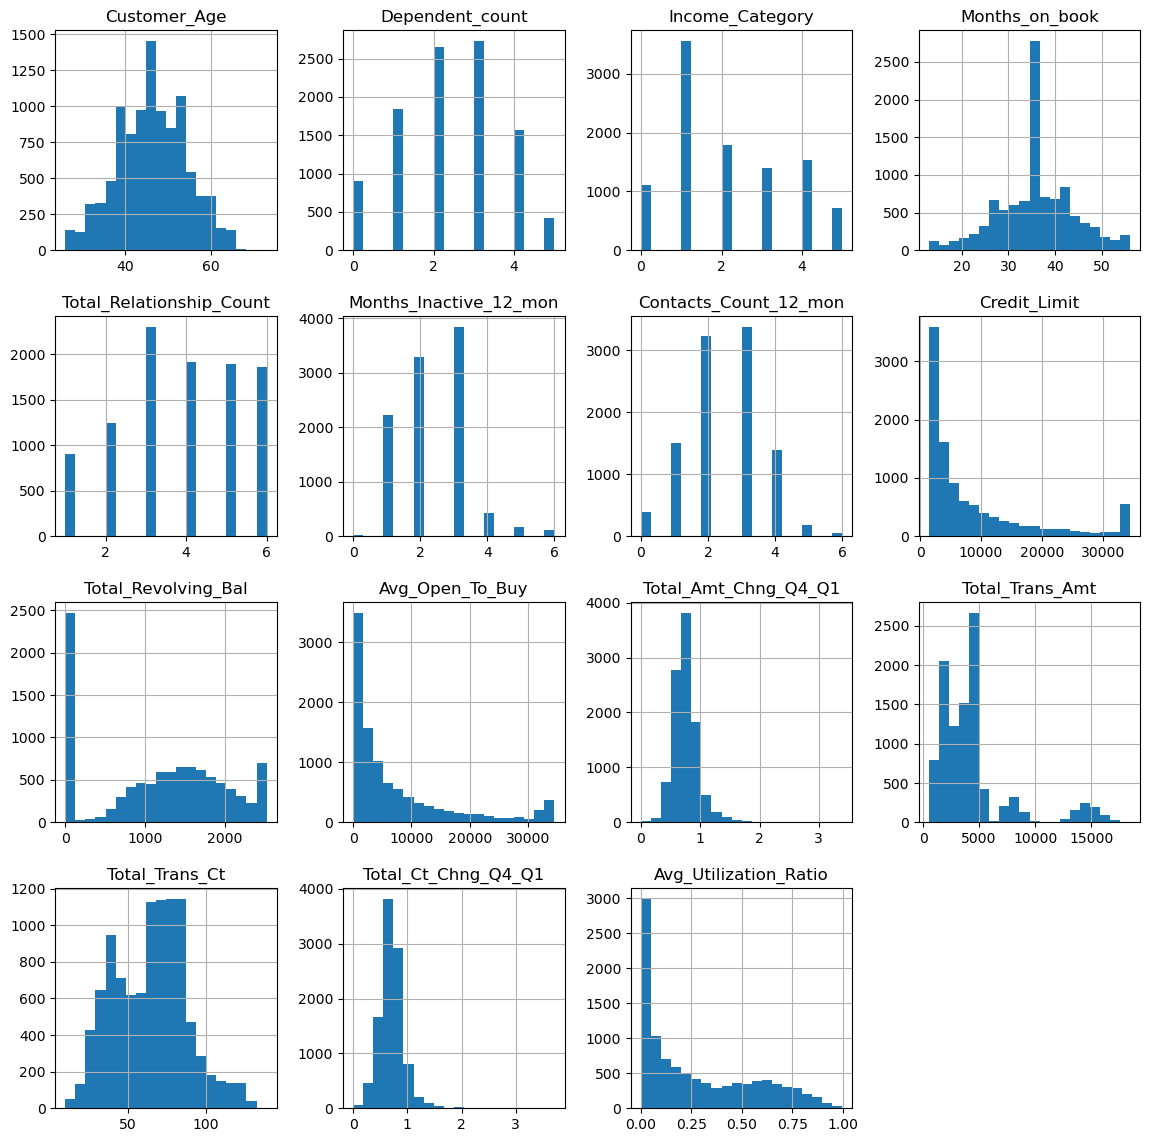

In [110]:
# Lets see the general distrubition of the numerical variables

axList = data.hist(bins=20, figsize = (14, 14))
plt.savefig("Hist.png")

<font size="5">4. Analysis and Visualization of the Data
</font>

In [115]:
# Lets check the customer age distribution with the Gender
fig = px.histogram(df, x="Customer_Age", title = "Customer Age Distribution",color="Gender")
fig.update_layout(bargap=0.2)
fig.show()

<font size="5">5. Conclusion
</font>

Note Done Yet!!!